In [1]:
#Import Numpy for statistical calculations and Matplotlib for plotting functions:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Import the lego data
lego = pd.read_csv('lego.csv')

#Read to check the data imported properly
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [3]:
#Check data shape
lego.shape

(12261, 7)

In [4]:
#Check data types
lego.dtypes

ages                   int64
list_price           float64
num_reviews            int64
piece_count            int64
play_star_rating     float64
review_difficulty      int64
country                int64
dtype: object

In [5]:
lego

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.9900,2,277,4.0,0,20
1,19,19.9900,2,168,4.0,2,20
2,19,12.9900,11,74,4.3,2,20
3,5,99.9900,23,1032,3.6,0,20
4,5,79.9900,14,744,3.2,1,20
...,...,...,...,...,...,...,...
12256,23,36.5878,6,341,4.4,2,19
12257,23,24.3878,8,217,4.1,2,19
12258,23,24.3878,18,233,4.6,2,19
12259,20,12.1878,1,48,5.0,4,19


In [6]:
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


All data has been loaded correctly. All data types are numeric and there is no missing data

In [7]:
#Print the minimum and maximum values to view distribution
lego.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


In [8]:
#Import Seaborn
import seaborn as sns

<AxesSubplot:xlabel='piece_count', ylabel='list_price'>

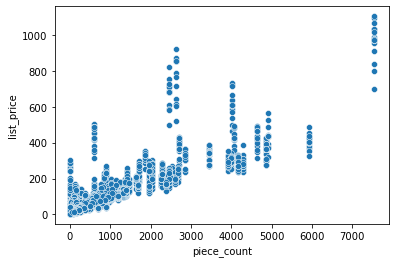

In [9]:
#create a lineplot
sns.scatterplot(x="piece_count", y="list_price", data=lego)

In general, the more pieces the lego kit has, the pricier it will be. There are a few spikes along the way, which may suggest that the price point is influenced by external influences such as product popularity etc.

In [10]:
#import all the necessary packages for simple and linear regressions
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [11]:
# dependent variable
y = lego['list_price'].values.reshape(-1, 1)

# independent variable
x = lego[['piece_count']].values.reshape(-1, 1)

In [12]:
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 

LinearRegression()

In [13]:
# Print the target values.
lm.predict(x) 

array([[44.16935263],
       [33.6057859 ],
       [24.49592101],
       ...,
       [39.90516056],
       [21.97617115],
       [27.88789198]])

In [14]:
#Estimate coefficients
lm.coef_

array([[0.09691346]])

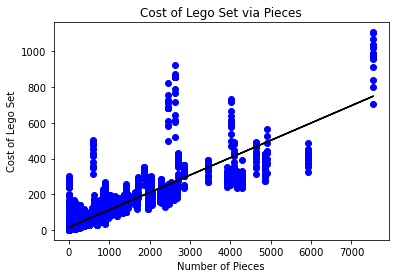

In [15]:
#Create a scatterplot 
plt.scatter(x, y, color = "blue")  
#Create a regression line in green.
plt.plot(x, lm.predict(x), color = "black") 
#Set the title for the graph.
plt.title("Cost of Lego Set via Pieces") 
#Set the label for the x-axis.
plt.xlabel("Number of Pieces") 
#Set the label for the y-axis.
plt.ylabel("Cost of Lego Set")
#Print the graph. 
plt.show() 

In [16]:
# Use the predict() method with an array to call the 
# cost for number of pieces per 1000.
predictedCost = lm.predict([[1000],[2000],[3000],[4000],[5000],[6000],
                              [7000], [8000]])  

# Print the results.
print(predictedCost)  

[[114.2377815 ]
 [211.15123776]
 [308.06469402]
 [404.97815027]
 [501.89160653]
 [598.80506278]
 [695.71851904]
 [792.6319753 ]]


In [17]:
#Split the data into train(70%) and test(30%).
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8582, 1) (3679, 1) (8582, 1) (3679, 1)


In [18]:
# Linear regression; fitting the model.
lm.fit(x_train,y_train) 

LinearRegression()

In [19]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

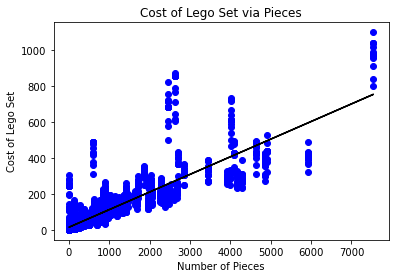

In [20]:
#Create a scatterplot for training data
plt.scatter(x_train, y_train, color = "blue")  
plt.plot(x_train, y_pred, color = "black")
plt.title("Cost of Lego Set via Pieces")
plt.xlabel("Number of Pieces") 
plt.ylabel("Cost of Lego Set") 
plt.show()  

In [21]:
# Print R-squared value of the training data.
print(lm.score(x_train,y_train)) 

0.7620655958129428


The R-square score for the train shows a strong indication of correlation between number of lego pieces and set prices. 

In [22]:
# Print the intercept value.
print("Intercept value: ", lm.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lm.coef_) 

Intercept value:  [17.05706039]
Coefficient value:  [[0.09767001]]


In [23]:
# Linear regression; fitting the model.
lm.fit(x_test,y_test)

LinearRegression()

In [24]:
# Predict the test set values.
y_pred = lm.predict(x_test) 

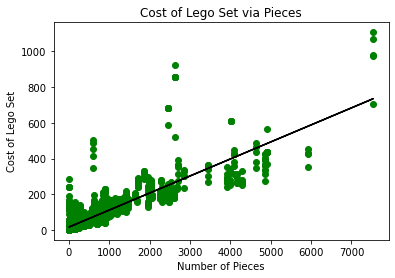

In [25]:
#Create a scatterplot using test data.
plt.scatter(x_test, y_test, color = "green")  
plt.plot(x_test, y_pred, color = "black")
plt.title("Cost of Lego Set via Pieces")
plt.xlabel("Number of Pieces")
plt.ylabel("Cost of Lego Set") 
#Print the graph. 
plt.show()  

In [26]:
# Print R-squared value of the test data.
print(lm.score(x_test,y_test)) 

0.741521572935383


The R-square score for the Test shows a strong indication of correlation between number of lego pieces and set prices. 

In [27]:
# Print the intercept value.
print("Intercept value: ", lm.intercept_) 
# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

Intercept value:  [17.99829499]
Coefficient value:  [[0.09499544]]


# Multiple Regressions

In [28]:
# dependent variable
y = lego['list_price']

# independent variable
X = lego[['piece_count', 'ages']]

In [29]:
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


In [30]:
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [31]:
#Run a multiple regression 
mlr = linear_model.LinearRegression()
mlr.fit(X, y)
mlr.predict(X) #Call prediction for dependent variable

array([44.23451228, 33.66784552, 24.5553072 , ..., 40.09246503,
       22.06566694, 27.97912265])

In [32]:
print("R-squared: ", mlr.score(X,y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

R-squared:  0.7562637453438302
Intercept:  16.79547480305046
Coefficients:


[('piece_count', 0.09694189692265538), ('ages', 0.030849054183007263)]

Splitting the data into train and test to run multiple regressions.

In [33]:
#Split the data into train(70%) and test(30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8582, 2) (3679, 2) (8582,) (3679,)


In [34]:
#Run a multiple regression on train data
mlr = linear_model.LinearRegression()
mlr.fit(X_train, y_train)
mlr.predict(X_train) #Call prediction for dependent variable

array([45.5404712 , 27.4323917 , 25.5743468 , ..., 27.33601167,
       25.003795  , 22.95662896])

In [35]:
print("R-squared: ", mlr.score(X_train,y_train))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X_train, mlr.coef_))

R-squared:  0.7452732278685434
Intercept:  16.92696772686955
Coefficients:


[('piece_count', 0.09638003648885454), ('ages', 0.05205423068548773)]

In [36]:
#Run a multiple regression on test data
mlr = linear_model.LinearRegression()
mlr.fit(X_test, y_test)
mlr.predict(X_test) 

array([ 39.41287906,  79.21106201,  39.67703944, ..., 199.23793231,
        70.0079188 , 258.30211419])

In [37]:
print("R-squared: ", mlr.score(X_test,y_test))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X_test, mlr.coef_))

R-squared:  0.781627480438805
Intercept:  16.43232945257884
Coefficients:


[('piece_count', 0.09820747696450377), ('ages', -0.014179812737363143)]

In [38]:
#Calculate the optimal price for lego sets with 8000 pieces most likely to be
#bought by 30 year olds
eight_thou_pieces = 8000
age_thirty = 30

print('Predicted Value: \n', mlr.predict([[eight_thou_pieces, age_thirty]]))

Predicted Value: 
 [801.66675079]


C:\Users\Akira\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Calculated value of lego sets with 8000 for 30 year old customers should be priced at 778.93